Donald. J. Trump, the 45th president of the United States, has to be the most influential user on Twitter. We have woken up on a number of days to international policy being decided and fortunes being lost by companies by his early morning rants. Here, I have pulled over 3200 tweets from the 70 year old through the twitter API using tweepy (see trumpy.py in the repository). We will try and assess his influence and popularity on twitter by looking at the number of retweets and favorites that his tweets have recieved over time.   

Let's begin by importing some standard packages. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
import seaborn as sns
import numpy as np
from textblob import TextBlob #an intuitive package to perform sentiment analysis
%matplotlib inline
import sys  
reload(sys)  
sys.setdefaultencoding('utf8') #for formatting the strings using textblob
pd.set_option('display.max_colwidth', -1) #to show full tweets in the cells.

I have saved the tweets and the corresponding number of retweets and favorites in a csv file. Lets import that as a dataframe, set index column to the date/time of the tweet and parse it as a datetime object. 

In [16]:
trump_tweets = pd.read_csv('realDonaldTrump_tweets.csv', index_col = 'created_at', parse_dates = True)

In [17]:
trump_tweets.head()

,id,text,retweets,favorites
created_at,,,,
2017-03-23 12:18:33,844886082663698436,Just watched the totally biased and fake news reports of the so-called Russia story on NBC and ABC. Such dishonesty!,8856,34487
2017-03-23 01:33:54,844723847094026242,Spoke to U.K. Prime Minister Theresa May today to offer condolences on the terrorist attack in London. She is strong and doing very well.,15472,85712
2017-03-23 01:04:32,844716458844311553,RT @mitchellvii: Trump always ends up being right. It's almost a little freaky.,13593,0
2017-03-23 01:03:18,844716149828993025,RT @mitchellvii: EXACTLY AS I SAID - House Intel Chair: We Cannot Rule Out Sr. Obama Officials Were Involved in Trump Surveillance https://…,10162,0
2017-03-22 13:09:35,844536536930619393,Big day for healthcare. Working hard!,11828,80776


We see that the file contains a tweet id, which is not very useful for us. There are also tweets with 0 likes. These are all from retweets. Since we are interested in his actual tweets and not the retweets, lets get rid of those. 

In [18]:
trump_tweets = trump_tweets.drop('id', axis = 1)
trump_tweets = trump_tweets[trump_tweets['favorites'] != 0]

Now that we have a clean dataset, lets plot the number of retweets and favorites over time. 

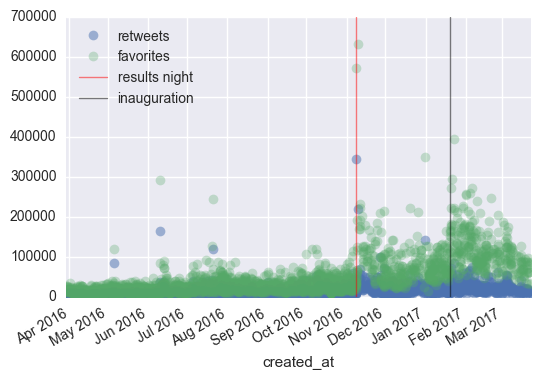

In [19]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = trump_tweets['retweets'].plot(style = 'o', alpha = 0.5, label = 'retweets')
ax1 = trump_tweets['favorites'].plot(style = 'o', alpha = 0.3, label = 'favorites')
ax1.axvline(pd.to_datetime('2016-11-08'), color='r', linestyle='-', lw=1, alpha = 0.5, label = 'results night')
ax1.axvline(pd.to_datetime('2017-01-20'), color='k', linestyle='-', lw=1, alpha = 0.5, label = 'inauguration')
plt.legend( loc = 'best')

First thing that we notice is that there are consistently more number of favorites than retweets. This is expected behaviour. A retweet shows up on your twitter feed whereas a favorite is mostly a harmless symbol of approval. People are typically more generous with the favorite button. We also see 2 clear peaks that correspond to the night the election results were announced and the day of the inauguration. 

Now lets see if the tweets that were retweeted more were also favorited more. To some extent on twitter a tweet that is favorited more has a high approval while a tweet that has been retweeted more has had more influence, for the better or worse. A regression plot should help us out here. 

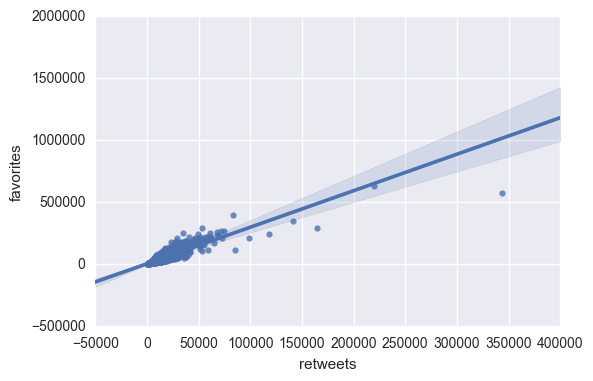

In [20]:
sns.regplot(trump_tweets['retweets'], trump_tweets['favorites'])

So, the tweets that were retweeted more do seem to be favorited more. Interesting... I did expect a wider spread here. Anyway, now lets look a the trend with the number of people favoriting his tweets. One way to do it would be to take a rolling mean. Here I have a rolling mean over the last 100 tweets. 

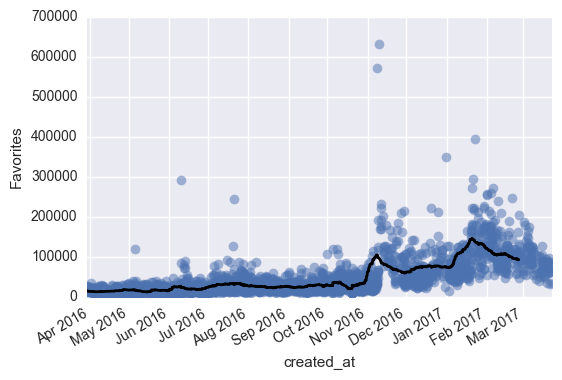

In [21]:
trump_tweets['rolling_f'] = pd.rolling_mean(trump_tweets['favorites'], 100)
trump_tweets['favorites'].plot(style = 'o', alpha = 0.5)
trump_tweets['rolling_f'].plot(lw= 2, c = 'k')
plt.ylabel('Favorites')

Is that really a little dip that I see since February? I wonder how this correlates with his falling approval ratings thats all over the news. 

One of the cool things that we could do with these tweets is to run a sentiment analysis on them. Sentiment analysis essentially looks at the words that make up the tweet and tries to determine its polarity and subjectivity. TextBlob is a neat little package that gives us these two parameters as an output. Lets run the tweets through the analysis and include polarity and subjectivity as columns in our data frame. 

In [22]:
polarity = []
subjectivity = []
for text in trump_tweets['text']:
    sample = TextBlob(text)
    polarity.append(sample.sentiment.polarity)
    subjectivity.append(sample.sentiment.subjectivity)

In [23]:
trump_tweets['polarity'] = pd.Series(polarity, index = trump_tweets.index)
trump_tweets['subjectivity'] = pd.Series(subjectivity, index = trump_tweets.index)
trump_tweets.head()

,text,retweets,favorites,rolling_f,polarity,subjectivity
created_at,,,,,,
2017-03-23 12:18:33,Just watched the totally biased and fake news reports of the so-called Russia story on NBC and ABC. Such dishonesty!,8856,34487,NaN,-0.166667,0.750000
2017-03-23 01:33:54,Spoke to U.K. Prime Minister Theresa May today to offer condolences on the terrorist attack in London. She is strong and doing very well.,15472,85712,NaN,0.316667,0.516667
2017-03-22 13:09:35,Big day for healthcare. Working hard!,11828,80776,NaN,-0.182292,0.320833
2017-03-21 18:12:05,"Today on #NationalAgDay, we honor our great American farmers &amp; ranchers. Their hard work &amp; dedication are ingrained… https://t.co/IpGRhly2zj",13925,61484,NaN,0.169444,0.430556
2017-03-21 17:33:23,"Honored to sign S.442 today. With this legislation, we support @NASA's scientists, engineers, and astronauts in the… https://t.co/Z5VwluvJQx",14103,61187,NaN,0.000000,0.000000


So, there we have it. Let's check how well the analysis did. I am going to list out some 'definitely positive' and 'definitely negative' tweets. Lets start with the positive ones. 

In [24]:
trump_tweets_pos = trump_tweets[trump_tweets['polarity'] > 0.5]
trump_tweets_pos.head()

,text,retweets,favorites,rolling_f,polarity,subjectivity
created_at,,,,,,
2017-03-21 02:18:20,"Thank you Louisville, Kentucky. Together, we will MAKE AMERICA SAFE AND GREAT AGAIN! https://t.co/qGgWEWUvek",14230,72449,NaN,0.750000,0.625000
2017-03-20 17:15:18,Congratulations Eric &amp; Lara. Very proud and happy for the two of you! https://t.co/s0T3cTQc40,13315,97752,NaN,1.000000,1.000000
2017-03-17 15:39:10,Great meeting with the @RepublicanStudy Committee this morning at the @WhiteHouse! https://t.co/8Y2UoHoYaY,8209,45987,NaN,1.000000,0.750000
2017-03-17 12:12:04,Happy Lá Fheile Phadraig to all of my great Irish friends!,12202,68276,NaN,0.533333,0.583333
2017-03-16 21:54:02,Great progress on healthcare. Improvements being made - Republicans coming together!,11181,70085,NaN,1.000000,0.750000


OK, that looks pretty good. A lot of 'Great's in there. 'Happy', 'improvement', 'Thank you', 'progress'... these all definitely indicate positive sentiment. Let's look at the bad ones now. These ought to be good. 

In [25]:
trump_tweets_neg = trump_tweets[trump_tweets['polarity'] < -0.5]
trump_tweets_neg.head()

,text,retweets,favorites,rolling_f,polarity,subjectivity
created_at,,,,,,
2017-03-20 10:35:28,James Clapper and others stated that there is no evidence Potus colluded with Russia. This story is FAKE NEWS and everyone knows it!,16950,69299,NaN,-0.625000,1.000000
2017-03-17 13:07:15,"North Korea is behaving very badly. They have been ""playing"" the United States for years. China has done little to help!",20861,88727,NaN,-0.572187,0.683333
2017-03-07 12:04:13,"122 vicious prisoners, released by the Obama Administration from Gitmo, have returned to the battlefield. Just another terrible decision!",23064,93937,NaN,-1.000000,1.000000
2017-03-04 11:35:20,"Terrible! Just found out that Obama had my ""wires tapped"" in Trump Tower just before the victory. Nothing found. This is McCarthyism!",51164,145605,NaN,-1.000000,1.000000
2017-02-24 12:36:34,find the leakers within the FBI itself. Classified information is being given to media that could have a devastating effect on U.S. FIND NOW,21955,102052,93958.95,-1.000000,1.000000


The Obama wire tap claim made it here. Yay! Leakers, North Korea, Gitmo, FAKE NEWS, it's the whole package really. Lets now plot the number of retweets again, but with the information about polarity included. 

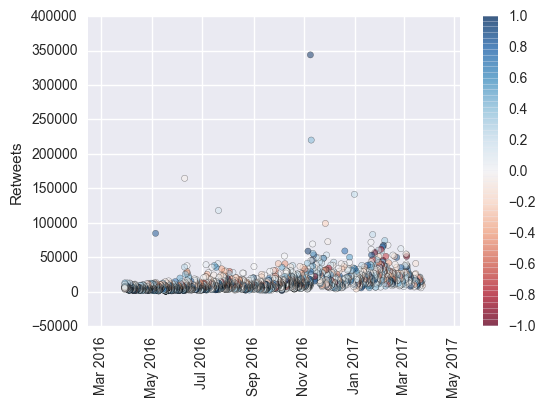

In [26]:
plt.scatter(trump_tweets.index, trump_tweets['retweets'], c = trump_tweets['polarity'].values, cmap = cm.RdBu, alpha = 0.5)
plt.colorbar()
plt.xticks(rotation = 'vertical')
plt.ylabel('Retweets')

It isn't easy to draw any conclusions but it does seem like most of the tweets at the top edge are clearly blue or pink, indicating clealry positive or negative. That is sort of expected I suppose. Let's plot it on a log scale for clarity. We will throw in the number of favorites as well. 

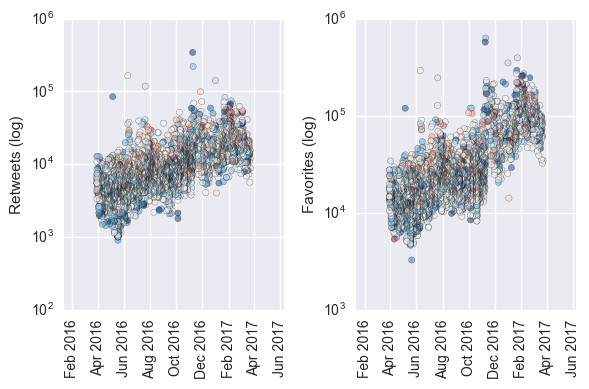

In [27]:
fig3 = plt.figure()
ax1 = fig3.add_subplot(1,2,1)
ax1.scatter(trump_tweets.index, trump_tweets['retweets'], c = trump_tweets['polarity'].values, cmap = cm.RdBu, alpha = 0.5)
ax1.set_yscale('log')
ax1.set_ylabel('Retweets (log)')
plt.xticks(rotation = 'vertical')
ax2 = fig3.add_subplot(1,2,2)
ax2.scatter(trump_tweets.index, trump_tweets['favorites'], c = trump_tweets['polarity'].values, cmap = cm.RdBu, alpha = 0.5)
ax2.set_yscale('log')
ax2.set_ylabel('Favorites (log)')
plt.xticks(rotation = 'vertical')
plt.tight_layout()

Still hard to make out, but there is clearly more pink at the top than at the bottom. Who is surprised to find out that the negative tweets get you more mileage on twitter? Not me!

Let's now plot retweets vs favorites again but with polarity information included. Also on the log scale for clarity. 

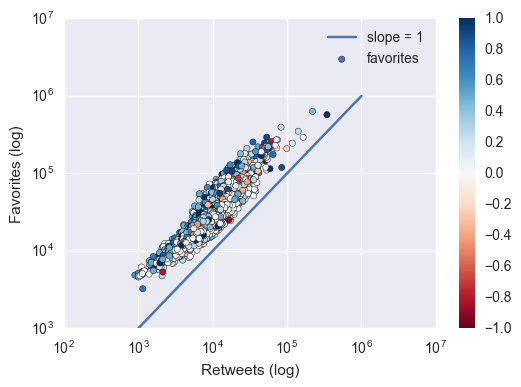

In [28]:
plt.scatter(trump_tweets['retweets'], trump_tweets['favorites'], c = trump_tweets['polarity'].values, cmap = cm.RdBu)
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Retweets (log)')
plt.ylabel('Favorites (log)')
x = np.linspace(1000, 1000000)
y = np.linspace(1000, 1000000)
plt.plot(x,y, label = 'slope = 1')
plt.legend(loc = 'best')

Finally something interesting! See how the top edge of this cloud is all blue? So, the positive tweets are the ones that are getting a lot of favorites. Whereas the negative ones get retweeted more. Ah, twitter, how predictible of you!

There is clearly a lot more that can be done with this dataset. I haven't even counted the number of times Trump has said FAKE NEWS in his tweets. This is a definitely a data set that I will be returning to. Watch this space! 